# sRSA

**Problem:**

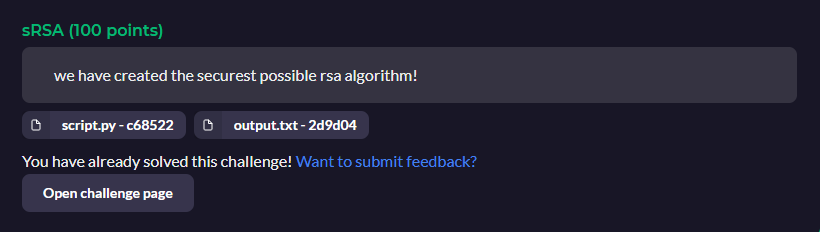



In [ ]:
#script.py

from Crypto.Util.number import *

p = getPrime(256)
q = getPrime(256)
n = 5496273377454199065242669248583423666922734652724977923256519661692097814683426757178129328854814879115976202924927868808744465886633837487140240744798219
e = 0x69420

flag = bytes_to_long(open("flag.txt", "rb").read())
print("n =",n)
print("e =", e)
print("ct =",(flag * e) % n)

**output.txt**

n = 5496273377454199065242669248583423666922734652724977923256519661692097814683426757178129328854814879115976202924927868808744465886633837487140240744798219

e = 431136

ct = 3258949841055516264978851602001574678758659990591377418619956168981354029697501692633419406607677808798749678532871833190946495336912907920485168329153735


**Solve:**

Dễ thấy: cipher = (flag*e) % n

=> $flag*e = cipher + i*n$

Brute force i, khi nào thấy đúng thì oke.

In [ ]:
#solve.py

from Crypto.Util.number import *
import gmpy2

n = 5496273377454199065242669248583423666922734652724977923256519661692097814683426757178129328854814879115976202924927868808744465886633837487140240744798219
e = 431136
ct = 3258949841055516264978851602001574678758659990591377418619956168981354029697501692633419406607677808798749678532871833190946495336912907920485168329153735

for i in range(1000000):
    tmp = ct + i*n
    if (tmp % e == 0):
        print("i = ", i)
        flag = tmp//e
        print(long_to_bytes(flag))
        print(flag)

> FLAG: rarctf{ST3GL0LS_ju5t_k1dd1ng_th1s_w4s_n0t_st3g_L0L!_83b7e829d9}

# minigen

**Problem:**

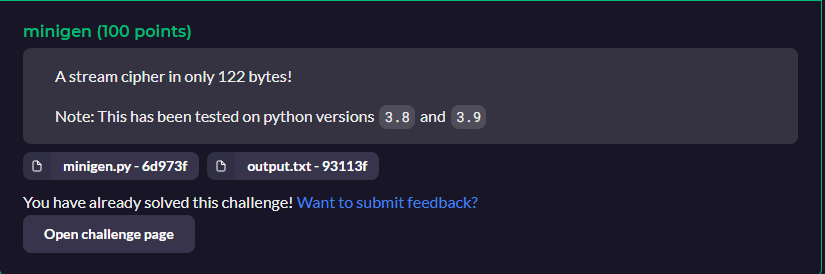

In [ ]:
#minigen.py

exec('def f(x):'+'yield((x:=-~x)*x+-~-x)%727;'*100)
g=f(id(f));print(*map(lambda c:ord(c)^next(g),list(open('f').read())))

**output.txt:**

281 547 54 380 392 98 158 440 724 218 406 672 193 457 694 208 455 745 196 450 724

**Solve:**

Có 2 cách để làm bài này:


1.   Vẫn là brute force thần thánh, copy y chang code rồi brute force id(f) ở hàm g = f(id(f)), sau đó tìm kiếm đáp án bao gồm 'rarctf{' là xong
2.   Phân tích:

  *   Id(f) là id của hàm ở hệ thống mỗi lần run chương trình, nghĩa là cứ mỗi lần run, id(f) là một con số khác.
  *   Hàm yield là 1 hàm return, nhưng khác ở chỗ là yield return ra 1 object, như code ở trên nó return ra 1 lô x (chạy x100)
  *   Để ý bên trong hàm yield: sau khi (x:=-~x) thì x sẽ biến thành -~x rồi mới tiếp tục xử lí các phép tính tiếp theo.
  *   Rút ra được: (x:=-~x)*x+-~-x <=> (x:=x+1)*x-x+1 (ở đây để mình dễ debug và tìm id(f) thôi, không cần cũng được)
  *   Biết được flag sẽ bắt đầu là 'rarctf{', và trong hàm là ord(c)^next(g), dễ thấy next(g) = 'r' ^ output[0] = 363
  *   Từ công thức trên: ((x:=x+1)*x-x+1)  %727, ta tìm được x = 470, thay vô là xong 
                   





In [ ]:
#solve.py

exec('def f(x):'+'yield ((x:=x+1)*x-x+1) %727;'*100)
g = f(470)
print(*map(lambda c:chr(int(c)^next(g)),list(open('output.txt').read().split())), end = '')

# for i in range(257,10000):
#     if ((i*i + i + 1) % 727 == 363):
#         print(i)
#         break

> FLAG: rarctf{pyg01f_1s_fun}

# Shamir's Stingy Sharing

**Problem:**

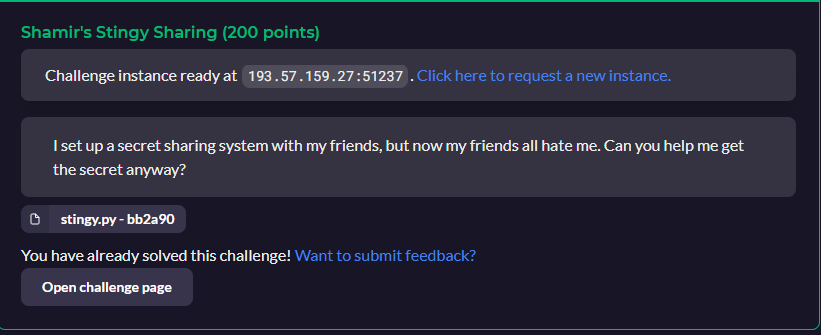

In [ ]:
#stingy.py

import random, sys
from Crypto.Util.number import long_to_bytes

def bxor(ba1,ba2):
	return bytes([_a ^ _b for _a, _b in zip(ba1, ba2)])

BITS = 128
SHARES = 30

poly = [random.getrandbits(BITS) for _ in range(SHARES)]
flag = open("flag.txt","rb").read()

random.seed(poly[0])
print(bxor(flag, long_to_bytes(random.getrandbits(len(flag)*8))).hex())

try:
	x = int(input('Take a share... BUT ONLY ONE. '))
except:
	print('Do you know what an integer is?')
	sys.exit(1)
if abs(x) < 1:
	print('No.')
else:
	print(sum(map(lambda i: poly[i] * pow(x, i), range(len(poly)))))

**Solve**

Mấu chốt bài này mình tìm được poly[0] là xong bài!!! 

Vì: hàm random.seed(x) sẽ random ra 1 số cố định, nếu x mình biết trước, có thể đọc thêm tài liệu ở [đây](https://pynative.com/python-random-seed/)

Đề cho mỗi tổng $poly[0] * x^0 + poly[1] * x^1 + ... + poly[29]* x^29 $ (với x là input mình nhập vào)

* Khai thác:
  Có thể thấy mỗi phần tử trong mảng poly gồm 128 bits, vậy chuyện gì sẽ xảy ra nếu mình nhập 1 số bự kiểu 1000000..000?

  => Kết quả sẽ là: poly[29]00..000poly[28]00..00 ... poly[1]00..00poly[0]

  Vậy mình cắt phần đuôi ra là lấy được poly[0] ròi, thế lên trên rồi giải thôi
(nhớ brute force độ dài của flag nữa :D)




In [ ]:
#real_solve.py

import random, sys
from Crypto.Util.number import long_to_bytes

def bxor(ba1,ba2):
	return bytes([_a ^ _b for _a, _b in zip(ba1, ba2)])

flag = bytearray.fromhex("f00128738e0088f30852ac90af5c97f659ca54413e7009a95412b48762c8f6")

for i in range(100):
    random.seed(51244664924293845115576096916550700677)
    print(bxor(flag, long_to_bytes(random.getrandbits(i*8))))    

#print(bxor(flag, long_to_bytes(random.getrandbits(len(flag)*8))).hex())

> FLAG: rarctf{n3v3r_trust_4n_1nt3g3r}